In [1]:
import os
import shutil
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
import pywt
%matplotlib inline

In [2]:
# Set the default line color to dark pink
plt.rcParams['lines.color'] = '#FF1493'

# Set the facecolor of the figure and axes to gray
plt.rcParams['figure.facecolor'] = '#969696'
plt.rcParams['axes.facecolor'] = '#969696'

# Set the text color, axes label color, and tick color to white
plt.rcParams['text.color'] = 'Black'
plt.rcParams['axes.labelcolor'] = 'Black'
plt.rcParams['xtick.color'] = 'Black'
plt.rcParams['ytick.color'] = 'Black'

a=1
print(a)

1


In [3]:
img = cv2.imread('./test_image/E_musk_1.jpg')
img.shape

(500, 750, 3)

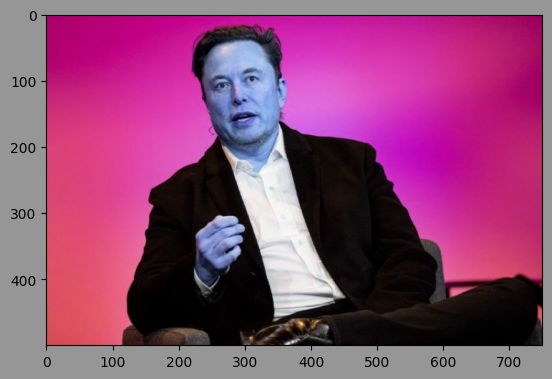

In [4]:
plt.imshow(img)

(500, 750)

[[51 51 51 ... 45 45 45]
 [51 51 51 ... 45 45 45]
 [51 51 51 ... 45 45 45]
 ...
 [93 94 94 ... 38 41 41]
 [93 93 94 ... 32 35 37]
 [92 93 94 ... 31 33 35]]


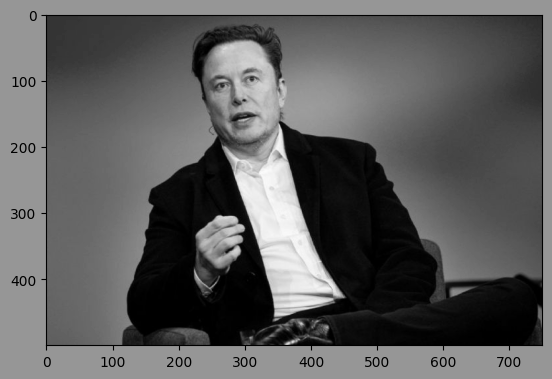

In [5]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
print(gray.shape)
print('')
print(gray)
plt.imshow(gray, cmap='gray')

In [6]:
face_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_eye.xml')
faces = face_cascade.detectMultiScale(gray, 1.3, 5)
print(faces.dtype)
print(faces)

int32
[[224  47 138 138]]


In [7]:
(x,y,w,h) = faces[0]
x,y,w,h

(224, 47, 138, 138)

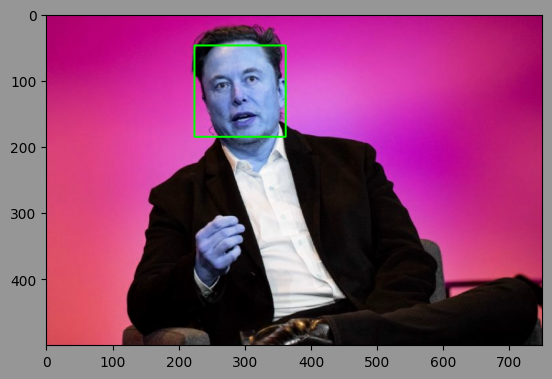

In [8]:
face = cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
plt.imshow(face)

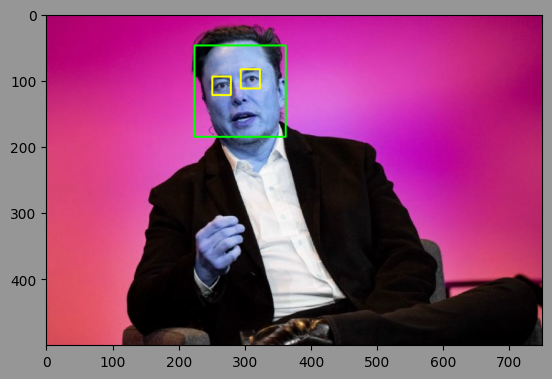

In [9]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face = cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(255,255,0),2)
plt.figure()
plt.imshow(face, cmap='gray')
plt.show()

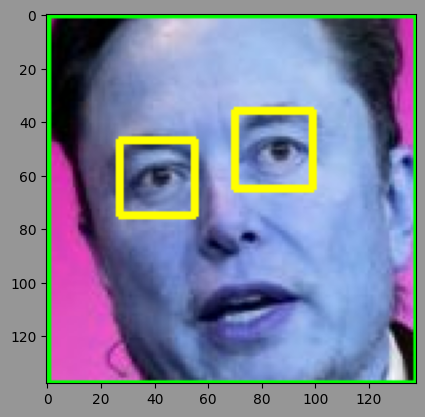

In [10]:
plt.imshow(roi_color, cmap='gray')

In [11]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color


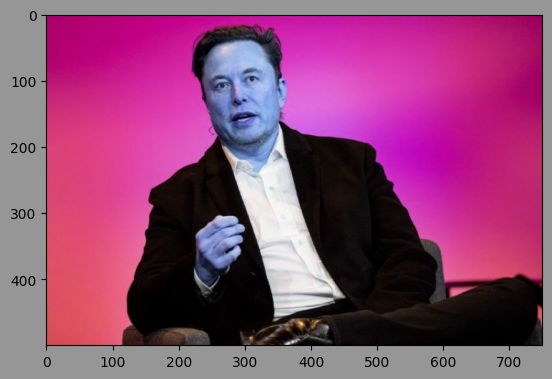

In [12]:
original_image = cv2.imread('./test_image/E_musk_1.jpg')
plt.imshow(original_image)

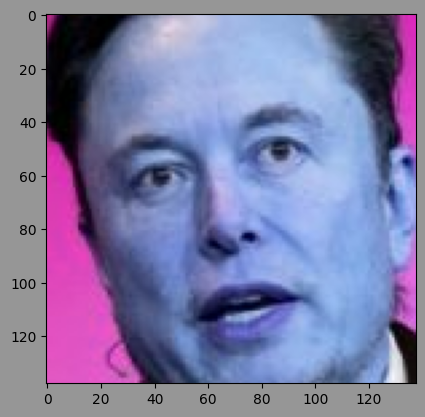

In [13]:
cropped_image = get_cropped_image_if_2_eyes('./test_image/E_musk_1.jpg')
plt.imshow(cropped_image)

In [14]:
'''!ERROR!'''
""" cropped_image = get_cropped_image_if_2_eyes(original_image)
plt.imshow(cropped_image) """

' cropped_image = get_cropped_image_if_2_eyes(original_image)\nplt.imshow(cropped_image) '

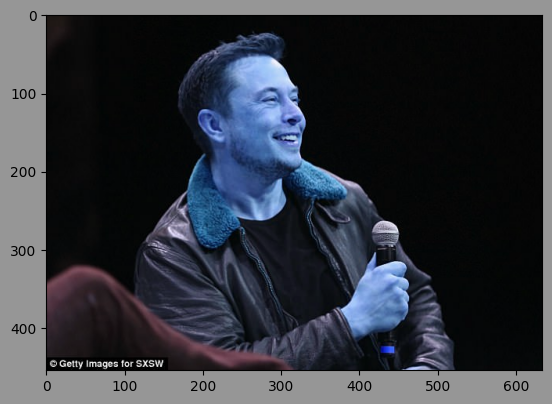

In [15]:
org_image_obstructed = cv2.imread('./test_image/E_musk_3.jpg')
plt.imshow(org_image_obstructed)

In [16]:
cropped_image_no_2_eyes = get_cropped_image_if_2_eyes('./test_image/E_musk_3.jpg')
cropped_image_no_2_eyes
# If 2 Eyes = Yes then show cropped face Else NOTHING due to the above function

In [17]:
all_data = "./Data_Set/"
croped_data = "./Data_Set/all_cropped_images/"

In [18]:

img_dirs = []
for entry in os.scandir(all_data):
    if entry.is_dir():
        img_dirs.append(entry.path)
img_dirs


['./Data_Set/all_cropped_images',
 './Data_Set/anna_de_armas',
 './Data_Set/Ariana_Grande',
 './Data_Set/Bill_Gates',
 './Data_Set/Chris_Evans',
 './Data_Set/Elon_Musk',
 './Data_Set/Magnus_Carlsen',
 './Data_Set/Tonny_Stark']

In [19]:

if os.path.exists(croped_data):
     shutil.rmtree(croped_data)
os.mkdir(croped_data)

In [23]:
cropped_image_folders = []
celebrity_names_dict = {}
for img_dir in img_dirs:
    number = 1
    name = img_dir.split('/')[-1]
    print(name)
    celebrity_names_dict[name] = []
    
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
                   
        if roi_color is not None:
            croped_folder = croped_data + name
            #print(croped_folder)
            
            if not os.path.exists(croped_folder):                   #If no folder create it (run once)
                os.makedirs(croped_folder)
                cropped_image_folders.append(croped_folder)         #lateral use
                
                print('Generating images in ', croped_folder)
                
            cropped_image_name = name + str(number) + ".png"
            cropped_file_path = croped_folder + "/" + cropped_image_name
            cv2.imwrite(cropped_file_path, roi_color)
            
            celebrity_names_dict[name].append(cropped_file_path)    #lateral use
            
            number += 1
#print(celebrity_names_dict)


all_cropped_images
anna_de_armas
Generating images in  ./Data_Set/all_cropped_images/anna_de_armas
Ariana_Grande
Generating images in  ./Data_Set/all_cropped_images/Ariana_Grande
Bill_Gates
Generating images in  ./Data_Set/all_cropped_images/Bill_Gates
Chris_Evans
Generating images in  ./Data_Set/all_cropped_images/Chris_Evans
Elon_Musk
Generating images in  ./Data_Set/all_cropped_images/Elon_Musk
Magnus_Carlsen
Generating images in  ./Data_Set/all_cropped_images/Magnus_Carlsen
Tonny_Stark
Generating images in  ./Data_Set/all_cropped_images/Tonny_Stark


In [20]:
print('Done: Data collected for cropped faces')
####----####-----####----####----####----####----####
celebrity_names_dict = {}
for img_dir in cropped_image_folders:
    celebrity_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celebrity_names_dict[celebrity_name] = file_list
celebrity_names_dict

Done: Data collected for cropped faces


NameError: name 'cropped_image_folders' is not defined

<h3> Image transformation in f domain using fourier transform: </h3>

In [22]:
print('image in f domain using *fourier transform*')
def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H
print('------------------------------------------')

image in f domain using *fourier transform*
------------------------------------------


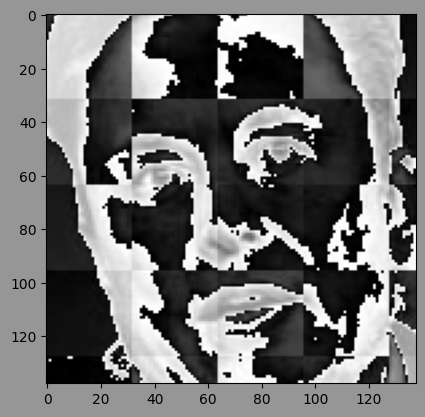

In [23]:
im_har = w2d(cropped_image,'db1',5)
plt.imshow(im_har, cmap='gray')

In [24]:
print(celebrity_names_dict.keys())

dict_keys([])


In [25]:
class_dict = {}
count = 0
for name in celebrity_names_dict.keys():
    class_dict[name] = count
    count = count + 1
class_dict

{}

In [26]:
####----####-----####----####----####----####----####----####----####----####----####----####----####----####

X, y = [], []
for name, training_files in celebrity_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[name])   

In [27]:
len(X[0])

IndexError: list index out of range

In [28]:
X[0]

IndexError: list index out of range

In [29]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(0, 4096)

In [42]:
X[0]

array([ 26.,  26.,  28., ...,   2.,   1., 214.])

In [43]:
y[0]

0

### Training model:

In [ ]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report